In [1]:
from google.colab import files
uploaded = files.upload()

Saving gender_submission.csv to gender_submission.csv
Saving test.csv to test.csv
Saving train.csv to train.csv


In [2]:
import pandas as pd

df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [4]:
df_train['Age'].fillna(df_train['Age'].median(), inplace=True)
df_train['Embarked'].fillna(df_train['Embarked'].mode()[0], inplace=True)

df_train['Sex'] = df_train['Sex'].map({'male': 0, 'female': 1})
df_train['Embarked'] = df_train['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1

features = ['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'FamilySize']
X = df_train[features]
y = df_train['Survived']


/tmp/ipython-input-2859027358.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['Age'].fillna(df_train['Age'].median(), inplace=True)
/tmp/ipython-input-2859027358.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [6]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Mean Squared Error: 0.1351
R2 Score: 0.4430
Coefficients: [-1.58094260e-01  5.16926470e-01 -4.78579546e-03  4.25778294e-04
  3.61522048e-02 -3.27409214e-02]
Intercept: 0.7436230592095308


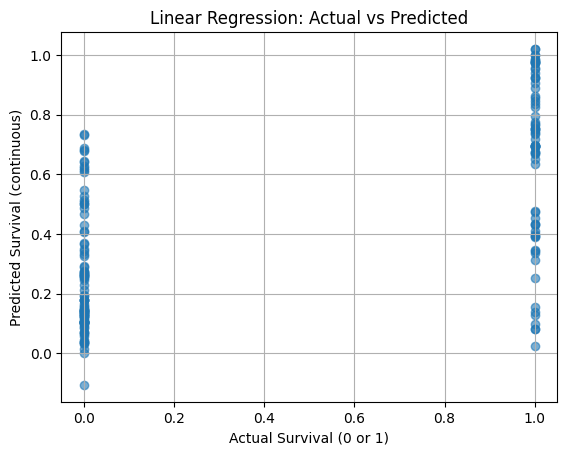

In [7]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R2 Score: {r2:.4f}")
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual Survival (0 or 1)")
plt.ylabel("Predicted Survival (continuous)")
plt.title("Linear Regression: Actual vs Predicted")
plt.grid()
plt.show()

In [10]:
y_pred = model.predict(X_test)
y_pred_class = (y_pred >= 0.5).astype(int)
acc = accuracy_score(y_test, y_pred_class)
print(f"Accuracy: {acc:.4f}")

Accuracy: 0.7821
